## Exploratory Data Analysis

In [104]:
############################################################################
# Name: Liam Navarre, Connor Deide
# Class: CPSC 322, Fall 2022
# Final Project
# 12/14/2022
#
# Description: This file contains an overview of our project and shows how
# we have prepared, used, and interpreted the data from our input files
############################################################################

In [105]:
import os
import importlib
import pandas as pd
import matplotlib.pyplot as plt

from project_application import project_utils
importlib.reload(project_utils)
from classifier_models import classifiers
importlib.reload(classifiers)
from classifier_models.classifiers import MyDummyClassifier as Dummy_clf
from classifier_models.classifiers import MyKNeighborsClassifier as KNeighbors_clf
from classifier_models.classifiers import MyNaiveBayesClassifier as NaiveBayes_clf

### Data Cleaning and Preperation

In [106]:
# Read the data from file
the_office_data_1 = pd.read_csv('./data/the_office_series.csv')
the_office_data_2 = pd.read_csv('./data/the_office_episodes.csv')

# Remove unwanted attributes from the two tables
# From dataframe 1
the_office_data_1.pop("Votes")
the_office_data_1.pop("Date")
the_office_data_1.pop("Director")
the_office_data_1.pop("Writers")
# From dataframe 2
the_office_data_2.pop("Season")
the_office_data_2.pop("EpisodeNumInSeason")
the_office_data_2.pop("OriginalAirDate")
the_office_data_2.pop("ProdCode")

# Join the data on the EpisodeNumOverall attribute
    # Serves as a unique id
the_office_data = pd.merge(the_office_data_1, the_office_data_2, on="EpisodeNumOverall", how="outer")
print("the_office_data Dataframe Statistics After Cleaning")
print(the_office_data.describe())
display(the_office_data)

the_office_data Dataframe Statistics After Cleaning
       EpisodeNumOverall      Season     Ratings  Viewership    Duration  \
count         188.000000  188.000000  188.000000  188.000000  188.000000   
mean           93.500000    5.468085    8.237234    7.246330   27.053191   
std            54.415071    2.386245    0.589930    2.066012    6.937254   
min             0.000000    1.000000    6.600000    3.250000   19.000000   
25%            46.750000    3.000000    7.800000    5.990000   22.000000   
50%            93.500000    6.000000    8.200000    7.535000   23.000000   
75%           140.250000    7.250000    8.600000    8.425000   30.000000   
max           187.000000    9.000000    9.800000   22.910000   60.000000   

          USViewers  
count  1.880000e+02  
mean   7.246330e+06  
std    2.066012e+06  
min    3.250000e+06  
25%    5.990000e+06  
50%    7.535000e+06  
75%    8.425000e+06  
max    2.291000e+07  


,EpisodeNumOverall,Season,EpisodeTitle,About,Ratings,Viewership,Duration,GuestStars,Title,DirectedBy,WrittenBy,USViewers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,11.20,23,NaN,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,11200000.0
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.00,23,NaN,Diversity Day,Ken Kwapis,B. J. Novak,6000000.0
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.80,22,NaN,Health Care,Ken Whittingham,Paul Lieberstein,5800000.0
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.40,23,NaN,The Alliance,Bryan Gordon,Michael Schur,5400000.0
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.00,23,NaN,Basketball,Greg Daniels,Greg Daniels,5000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,3.83,22,NaN,Stairmageddon,Matt Sohn,Dan Sterling,3830000.0
184,184,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,3.25,22,NaN,Paper Airplane,Jesse Peretz,Halsted Sullivan & Warren Lieberstein,3250000.0
185,185,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,3.51,42,Michael Imperioli,Livin' the Dream,Jeffrey Blitz,Niki Schwartz-Wright,3510000.0
186,186,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,4.56,43,NaN,A.A.R.M.,David Rogers,Brent Forrester,4560000.0


### Data Aggregation 

In [107]:
discretized_ratings_ser = []
true_false_star_ser = []
test = []

ratings_ser = the_office_data["Ratings"]
viewership_ser = the_office_data["Viewership"]
duration_ser = the_office_data["Duration"]
guest_star_ser = the_office_data["GuestStars"]
directed_ser = the_office_data["DirectedBy"]
test2 = []
# for val in ratings_ser:
#     tempVal = round(val)
#     discretized_ratings_ser.append(tempVal)

for val in guest_star_ser:
    if isinstance(val, float):
        tempVal = ""
    else:
        tempVal = val
    true_false_star_ser.append(tempVal)
    
print(true_false_star_ser)

['', '', '', '', '', 'Amy Adams', '', '', 'Nancy Carell', 'Amy Adams', '', '', 'Tim Meadows', '', 'Ken Jeong', '', 'Rob Riggle', '', '', '', '', "Conan O'Brien", '', '', '', '', '', '', '', 'Jerome Bettis', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Kevin McHale', '', '', '', '', '', '', '', '', '', '', '', '', 'Wendi McLendon-Covey', '', '', '', '', '', '', '', '', '', '', 'Cloris Leachman, Jack Black, Jessica Alba', '', '', '', '', 'Idris Elba', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Mike Starr', '', '', '', '', '', '', '', '', 'Christian Slater', '', '', 'Mellisa Rauch', '', '', '', '', '', '', '', '', 'Evan Peters', '', '', '', 'Timothy Olyphant', '', '', '', '', '', '', '', 'Ricky Gervais', 'Will Arnett,  Ray Romano, Jim Carrey, Ricky Gervais', '', '', '', '', 'Will Ferrell', '', '', '', '', '', '', '', '', 'Josh Groban, Stephen Collins', '', '', '', '', 'Maura Tierney', '', '', '', '', '', '', '', '', '', '', '', '',

### Reflection
We decided to discretize the Guest Star column into "'s and the actors name to represent true and false. We thought that the amount of guest stars that would be present could be pretty vague and lead to inconclusive predictions. Something we could expand in this project would be running a data analysis on epsiodes that include guest stars

### Data Exploratory Analysis

#### Scatter Plots

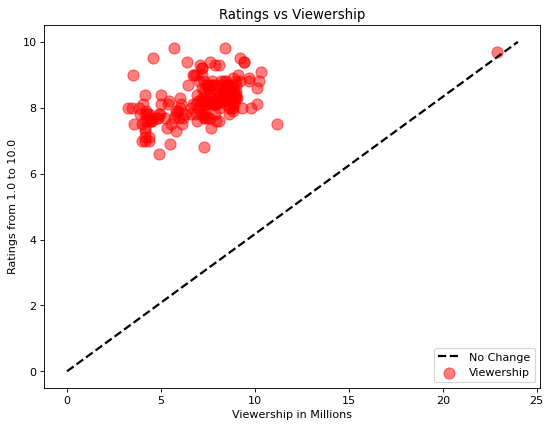

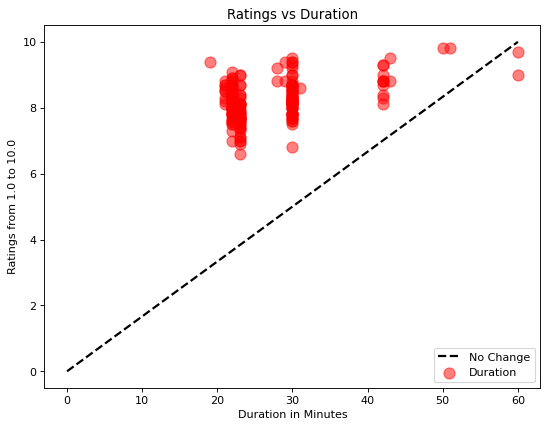

In [108]:
# For viewership
plt.figure(figsize=(8,6), dpi=80)
x = [0,24]
y = [0,10]
plt.scatter(viewership_ser, ratings_ser, s=100, c='red', alpha=0.5, label="Viewership")
plt.plot(x, y, color='black', linestyle = "dashed", linewidth=2, label="No Change")
plt.title("Ratings Vs Viewership")
plt.xlabel("Viewership in Millions")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 4)
plt.show()

#For duration
plt.figure(figsize=(8,6), dpi=80)
x = [0,60]
y = [0,10]
plt.scatter(duration_ser, ratings_ser, s=100, c='red', alpha=0.5, label="Duration")
plt.plot(x, y, color='black', linestyle = "dashed", linewidth=2, label="No Change")
plt.title("Ratings Vs Duration")
plt.xlabel("Duration in Minutes")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 4)
plt.show()


### Reflection

Based on the found graphs, we can say that the office out performs a typical show's statistics. This being based on both the viewship and the duration. Based on the amount of viewership the office gets, it gets a higher rating than what is expected for a show of that viewship. The same can be said about the duration. The office out performs what a typical show rating would be for a 22, 23, 30, 42, 52, and 60 minute episode

#### Bar Graphs

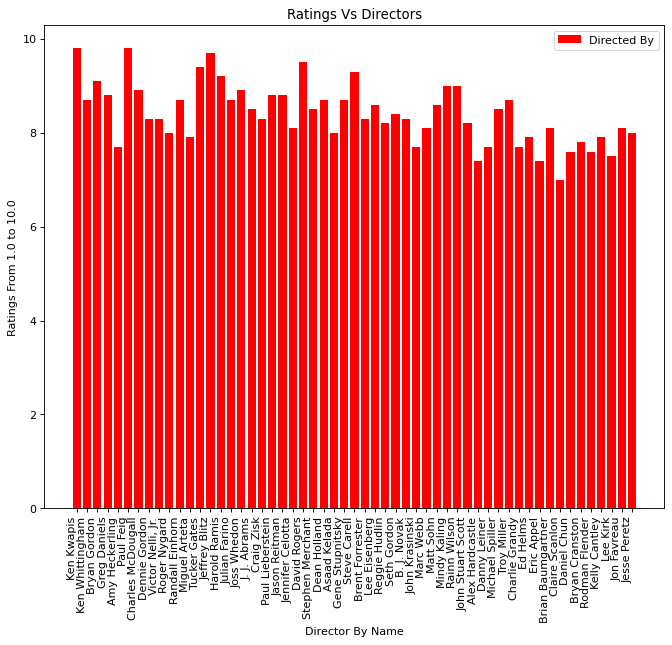

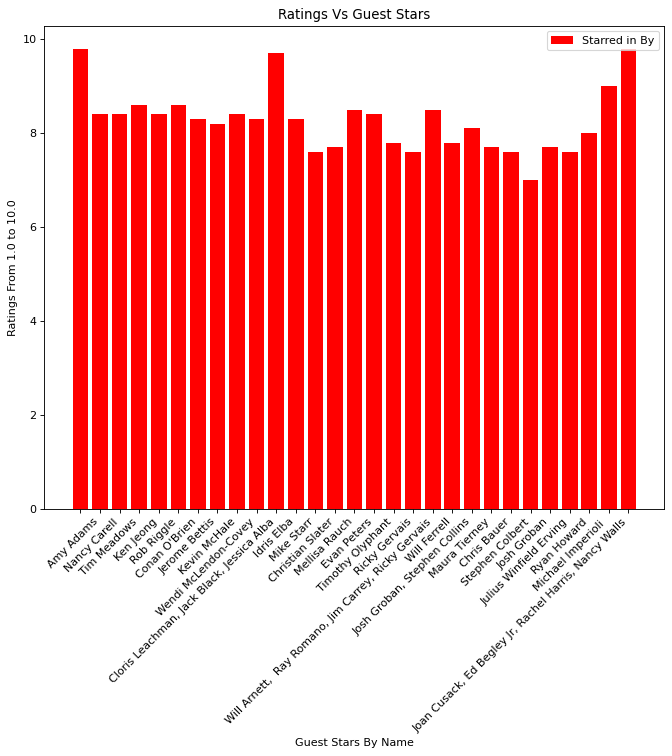

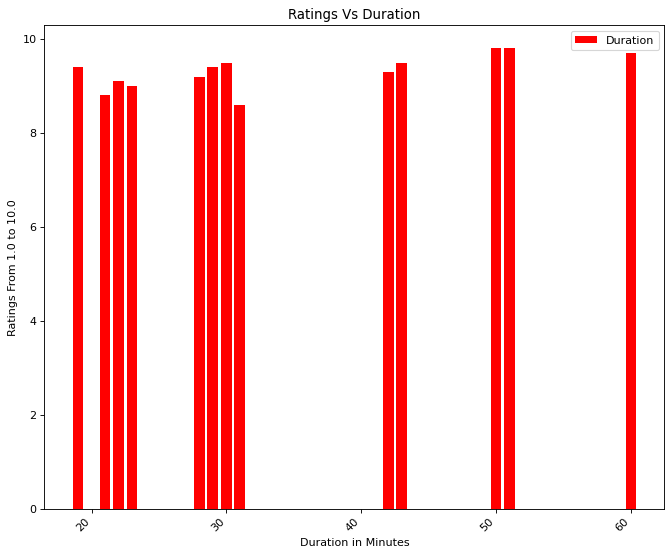

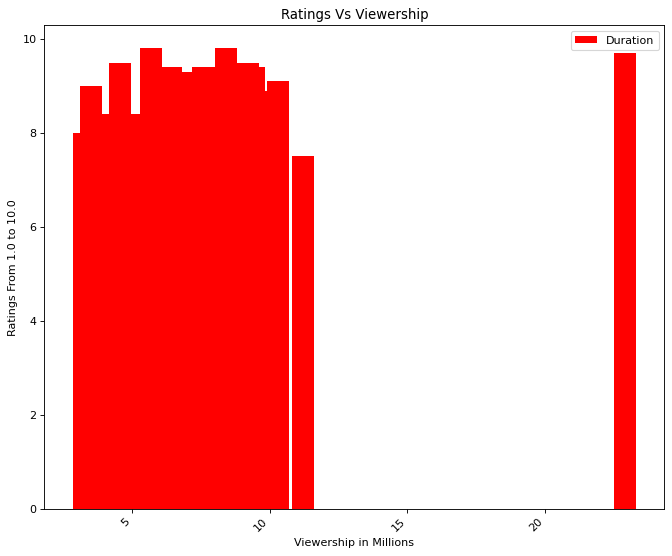

In [116]:
# For Director 
plt.figure(figsize=(10,8), dpi=80)
plt.bar(directed_ser, ratings_ser, color='red', label="Directed By")
plt.title("Ratings Vs Directors")
plt.xlabel("Director By Name")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 1)
plt.xticks(rotation=90, ha='right') 
plt.show()

# For Guest Stars
plt.figure(figsize=(10,8), dpi=80)
plt.bar(true_false_star_ser, ratings_ser, color='red', label="Starred in By")
plt.title("Ratings Vs Guest Stars")
plt.xlabel("Guest Stars By Name")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 1)
plt.xticks(rotation=45, ha='right') 
plt.show()

#For duration
plt.figure(figsize=(10,8), dpi=80)
plt.bar(duration_ser, ratings_ser, color='red', label="Duration", align='center')
plt.title("Ratings Vs Duration")
plt.xlabel("Duration in Minutes")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 1)
plt.xticks(rotation=45, ha='right') 
plt.show()

#For viewership
plt.figure(figsize=(10,8), dpi=80)
plt.bar(viewership_ser, ratings_ser, color='red', label="Duration", align='center')
plt.title("Ratings Vs Viewership")
plt.xlabel("Viewership in Millions")
plt.ylabel("Ratings From 1.0 to 10.0")
plt.legend(loc = 1)
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Reflection 

I believe the Ratings Vs. Directors and Ratings Vs. Guest Star are useful and exploratory data. While alternatively the viewership and duration graphs give redundant and hard to read data. In regards to the directors bar graph, the graph shows what directors have been the most successful in the shows creation. So it makes sense that Charles Mcdougall's episodes had some of the highest ratings due to the successful rapport he has in the industry. In regards to the guest star bar graph, the graph shows what guest stars drawed the most audience attention. If the creators of the office were to see what guest stars are a success they could potentially bring then back for future episodes. 